Importing all the necesery libraries 

In [333]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

Reading the csv file

In [334]:
df = pd.read_csv('Mortality_Status_Classification.csv')

Displaying the first 15 rows of the dataset

In [335]:
df.head(15)

,Month_of_Birth,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,12,68,0,0,0,2,3,1,4.0,1,1,24,1,60,1
1,12,50,1,1,2,1,2,1,35.0,1,1,14,5,62,1
2,11,58,2,2,4,1,2,1,63.0,1,1,14,7,75,1
3,3,58,0,0,0,2,3,1,18.0,1,1,2,1,84,1
4,1,47,1,0,1,2,3,1,41.0,1,1,3,1,50,1
5,2,51,0,0,0,1,2,1,20.0,1,1,18,2,89,1
6,5,51,0,0,0,4,1,1,8.0,1,1,11,1,54,1
7,4,40,1,0,1,1,2,1,30.0,1,1,9,1,14,0
8,6,40,3,2,4,2,3,1,103.0,1,1,20,18,70,1
9,4,69,3,2,4,4,1,0,32.0,1,1,21,12,92,1


Checking all the data types are as expected

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month_of_Birth          4017 non-null   int64  
 1   Age                     4017 non-null   int64  
 2   T_Stage                 4017 non-null   int64  
 3   N_Stage                 4017 non-null   int64  
 4   6th_Stage               4017 non-null   int64  
 5   Differentiated          4017 non-null   int64  
 6   Grade                   4017 non-null   int64  
 7   A_Stage                 4017 non-null   int64  
 8   Tumor_Size              4017 non-null   float64
 9   Estrogen_Status         4017 non-null   int64  
 10  Progesterone_Status     4017 non-null   int64  
 11  Regional_Node_Examined  4017 non-null   int64  
 12  Reginol_Node_Positive   4017 non-null   int64  
 13  Survival_Months         4017 non-null   int64  
 14  Mortality_Status        4017 non-null   

In [337]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

Seperating the x and y colums of the dataset

In [338]:
feature_cols = ["Month_of_Birth", "Age", "T_Stage", "N_Stage", "6th_Stage", "Differentiated", 
                "Grade", "A_Stage", "Tumor_Size", "Estrogen_Status", "Progesterone_Status",
                "Regional_Node_Examined", "Reginol_Node_Positive", "Survival_Months" ]

X = df[feature_cols]
y = df["Mortality_Status"]

In [339]:
list(X.columns)

['Month_of_Birth',
 'Age',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Survival_Months']

In [340]:
X.shape

(4017, 14)

Spliting X and y into a train and test, with a test split of 40%

In [341]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42, stratify=y)

initialinzing the model

In [342]:
logreg = LogisticRegression(penalty= "l1", solver="liblinear")

feeding the model with train data

In [343]:
logreg.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

Model predicting based on train dataset

In [344]:
y_pred_train=logreg.predict(X_train)

Model predicting based on test data set(data it has never seen before)

In [345]:
y_pred=logreg.predict(X_test)

Displayibg the actual result against the predicted results by the model

In [346]:
Comparison_df=pd.DataFrame({'Actual' : y_test,  'Predicted' : y_pred})
Comparison_df

,Actual,Predicted
3948,1,1
197,1,1
3242,0,1
2049,1,1
3241,1,1
...,...,...
1739,1,0
106,0,0
3918,1,1
2698,1,1


Accuracy score based on the train dataset

In [347]:
accuracy = accuracy_score(y_train, y_pred_train)
print ("the accuracy is: ", accuracy)

the accuracy is:  0.8932461873638344


Accuracy score based on test dataset

In [348]:
accuracy = accuracy_score(y_test, y_pred)
print ("The accuracy is: ", accuracy)

The accuracy is:  0.8980099502487562


In [349]:
cm_LR = confusion_matrix(y_test, y_pred, labels = logreg.classes_)

Plotting confusion matrix with all false positive negative and true positive and negative

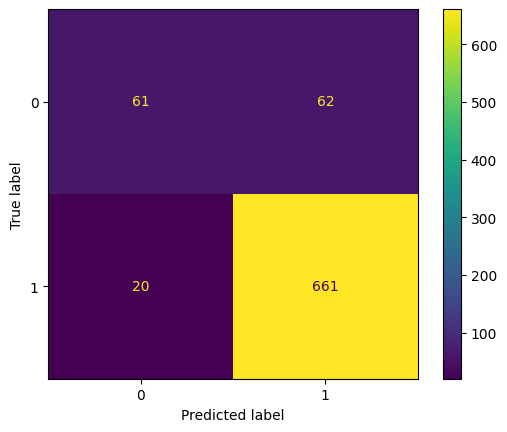

In [350]:
disp = ConfusionMatrixDisplay(cm_LR, display_labels = logreg.classes_)
disp.plot()

Dispalyin a classification report that shows the precision accuracy recall f1-score

In [351]:
print("----------------------------LR---------------------------")
print(classification_report(y_test, y_pred))

----------------------------LR---------------------------
              precision    recall  f1-score   support

           0       0.75      0.50      0.60       123
           1       0.91      0.97      0.94       681

    accuracy                           0.90       804
   macro avg       0.83      0.73      0.77       804
weighted avg       0.89      0.90      0.89       804



In [352]:
param_grid = {'penalty': ["l1","l2", "elasticnet"], 'multi_class': ["auto", "ovl", "multinominal"], 
              'solver':["lbfgs", "sag", "saga", "liblinear", "newton-cg", "newton-cholesky"]}
knn_gscv = GridSearchCV(logreg, param_grid, cv = 10)
knn_gscv.fit(X, y)
knn_gscv.best_params_

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_log

{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}

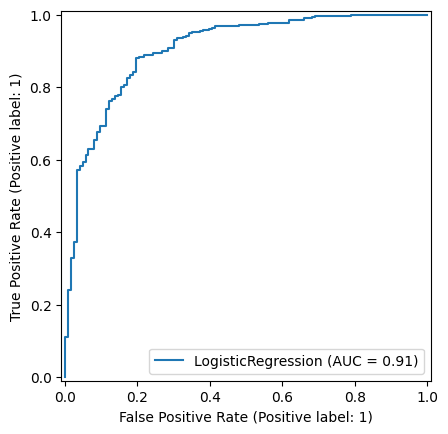

In [353]:
logreg = RocCurveDisplay.from_estimator(logreg, X_test, y_test)

In [354]:
logreg = LogisticRegression(penalty= "l1", solver="liblinear")

initializing the K nearest neighbors model

In [355]:
knn = KNeighborsClassifier(n_neighbors = 9)

Feeding the training data to the model

In [356]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

Predicting based on the test dataset

In [357]:
yKNN_pred = knn.predict(X_test)

Tunning the hyper perametars of the model to choose the best fit for the data given using GridSearchCV

In [358]:
param_grid = {'n_neighbors': [1,3,5,7,9]}
knn_gscv = GridSearchCV(knn, param_grid, cv = 10)
knn_gscv.fit(X, y)
knn_gscv.best_params_

{'n_neighbors': 9}

In [359]:
cm_KNN= confusion_matrix(y_test, yKNN_pred, labels = knn.classes_)

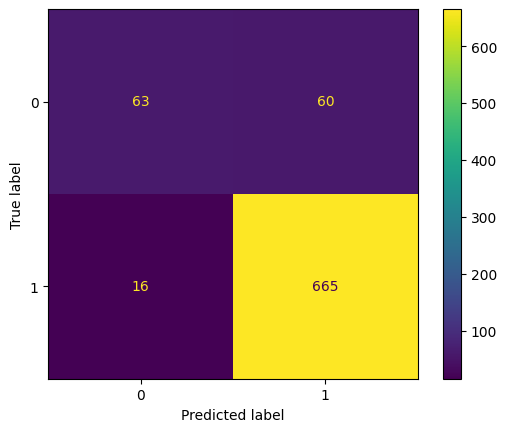

In [360]:
dispKNN = ConfusionMatrixDisplay(cm_KNN, display_labels = knn.classes_)
dispKNN.plot()

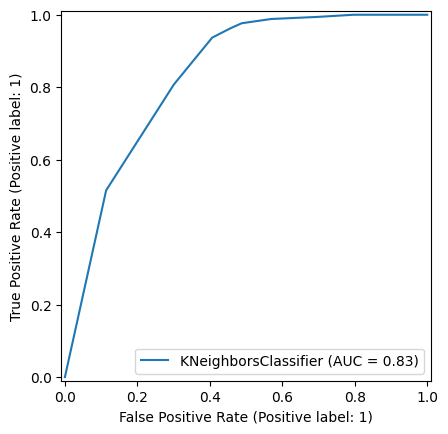

In [361]:
knn = RocCurveDisplay.from_estimator(knn, X_test, y_test)

In [362]:
knn = KNeighborsClassifier(n_neighbors = 9)

Displaying a classification report for KNN

In [363]:
print("----------------------------KNN---------------------------")
print(classification_report(y_test, yKNN_pred))

----------------------------KNN---------------------------
              precision    recall  f1-score   support

           0       0.80      0.51      0.62       123
           1       0.92      0.98      0.95       681

    accuracy                           0.91       804
   macro avg       0.86      0.74      0.78       804
weighted avg       0.90      0.91      0.90       804



Initializing Naive Bayes and fitting the training data in

In [364]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Predicting based on the test dataset

In [365]:
yNB_pred = nb.predict(X_test)

In [366]:
cm_NB = confusion_matrix(y_test, yNB_pred, labels = nb.classes_)

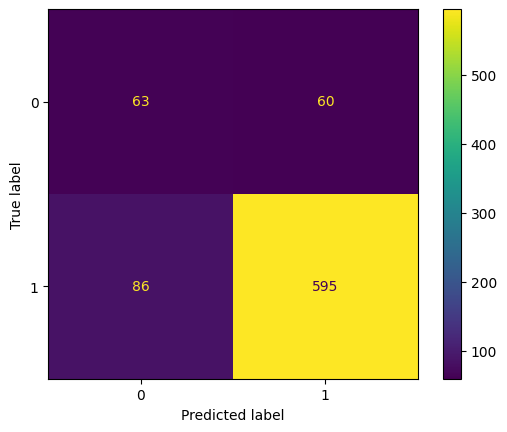

In [367]:
dispNB = ConfusionMatrixDisplay(cm_NB, display_labels = nb.classes_)
dispNB.plot()

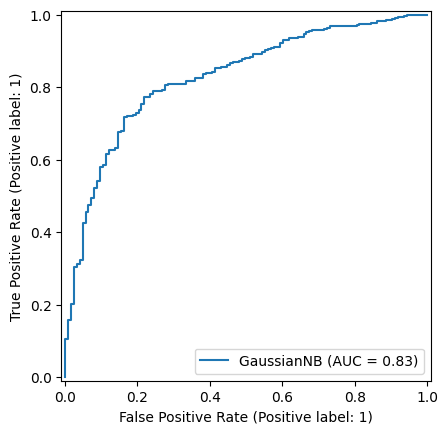

In [368]:
nb = RocCurveDisplay.from_estimator(nb, X_test, y_test)

A classifivation report for Naive Bayes

In [369]:
print("----------------------------NB---------------------------")
print(classification_report(y_test, yNB_pred))

----------------------------NB---------------------------
              precision    recall  f1-score   support

           0       0.42      0.51      0.46       123
           1       0.91      0.87      0.89       681

    accuracy                           0.82       804
   macro avg       0.67      0.69      0.68       804
weighted avg       0.83      0.82      0.83       804



In [370]:
base_learners=[('Alg1', knn), ('Alg2', logreg)]
ensemble_learner = VotingClassifier(base_learners, voting='soft')

In [371]:
ensemble_learner.fit(X_train, y_train)

VotingClassifier(estimators=[('Alg1', KNeighborsClassifier(n_neighbors=9)),
                             ('Alg2',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear'))],
                 voting='soft')

In [372]:
y_pred_ensemble_learner = ensemble_learner.predict(X_test)

In [373]:
ensemble_learner_accuracy = accuracy_score(y_test, y_pred_ensemble_learner)

print ("The voting ensemble classifier accuracy is: ", ensemble_learner_accuracy)

The voting ensemble classifier accuracy is:  0.9029850746268657


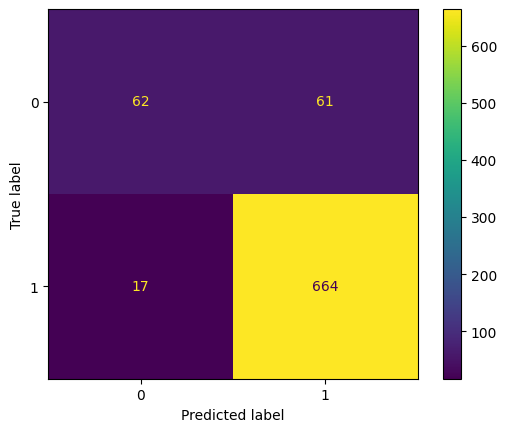

In [374]:
ensemble_learner_cm_test = confusion_matrix(y_test, y_pred_ensemble_learner, labels=ensemble_learner.classes_)

ensemble_learner_disp = ConfusionMatrixDisplay(ensemble_learner_cm_test,display_labels=ensemble_learner.classes_)

ensemble_learner_disp.plot()


In [375]:
print("--------------------Ensemble Learner-------------------")
print(classification_report(y_test, y_pred_ensemble_learner))

--------------------Ensemble Learner-------------------
              precision    recall  f1-score   support

           0       0.78      0.50      0.61       123
           1       0.92      0.98      0.94       681

    accuracy                           0.90       804
   macro avg       0.85      0.74      0.78       804
weighted avg       0.90      0.90      0.89       804



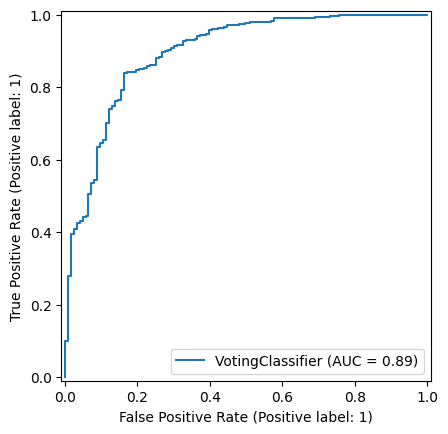

In [376]:
ensemble_learner = RocCurveDisplay.from_estimator(ensemble_learner, X_test, y_test)